# Exploratory Data Analysis

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_parquet('data/sentiment_data_0.parquet')
df1 = pd.read_parquet('data/sentiment_data_1.parquet')
df2 = pd.read_parquet('data/sentiment_data_2.parquet')    
df3 = pd.read_parquet('data/sentiment_data_3.parquet')
df4 = pd.read_parquet('data/sentiment_data_4.parquet')

In [2]:
df0.head()

,ID,publishedAt,instances,source-id,source-name,en-title,language,location_code,location,category,year,month,neg,neu,pos,compound,sentiment_category
0,12436,2020-08-06T09:21:27Z,"[{'category': 'general', 'collectedAt': '2020-...",None,Albidda.net,A doctor warns of new symptoms of “Corona” tha...,ar,ae,United Arab Emirates,general,2020,8,0.149,0.851,0.000,-0.2023,negative
1,12541,2020-08-06T15:45:39Z,"[{'category': 'general', 'collectedAt': '2020-...",None,Middle East Online,Foldable phones lead Samsung to climb the top ...,ar,ae,United Arab Emirates,general,2020,8,0.000,0.893,0.107,0.2023,positive
2,12568,2020-08-06T16:43:05Z,"[{'category': 'general', 'collectedAt': '2020-...",None,Alanba.com.kw,Explosive stars create calcium in - Kuwait New...,ar,ae,United Arab Emirates,general,2020,8,0.000,0.769,0.231,0.2732,positive
3,12795,2020-08-07T07:08:19Z,"[{'category': 'general', 'collectedAt': '2020-...",None,Al-ain.com,Twitter secures the accounts of governments an...,ar,ae,United Arab Emirates,general,2020,8,0.000,0.881,0.119,0.3182,positive
4,13129,2020-08-07T13:33:00Z,"[{'category': 'general', 'collectedAt': '2020-...",None,محليات,Corona patients without symptoms carry a viral...,ar,ae,United Arab Emirates,general,2020,8,0.176,0.824,0.000,-0.4939,negative


# Countries by Article Count

In [4]:
df_all = pd.concat([df0, df1, df2, df3, df4], ignore_index=True)

country_fix = {
    "United States": "United States of America",
    "Russia": "Russian Federation",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Iran": "Iran, Islamic Republic of",
    "Syria": "Syrian Arab Republic",
    "Vietnam": "Viet Nam",
    "Venezuela": "Venezuela, Bolivarian Republic of",
    "Bolivia": "Bolivia, Plurinational State of",
    "Congo": "Congo",
    "Democratic Republic of the Congo": "Congo, the Democratic Republic of the",
    "Tanzania": "Tanzania, United Republic of",
    "Moldova": "Moldova, Republic of",
    "Laos": "Lao People's Democratic Republic",
    "Myanmar": "Myanmar",
    "Taiwan": "Taiwan, Province of China",
    "Hong Kong": "Hong Kong",
}

df_all['location'] = df_all['location'].replace(country_fix)

In [ ]:
country_counts = df_all['location'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="count",
    color_continuous_scale="Viridis",
    title="Number of Articles Published by Country Heatmap"
)

fig.show()

C:\Users\erina\AppData\Local\Temp\ipykernel_4940\2721287564.py:6: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


# Matching Sources to Countries

In [23]:
df_usa = df_all[df_all['location'] == "United States of America"]

# top 20 news sources
top_sources = df_usa['source-name'].value_counts().head(20).index
df_usa_top = df_usa[df_usa['source-name'].isin(top_sources)]

# count
source_counts = df_usa_top['source-name'].value_counts().reset_index()
source_counts.columns = ['source-name', 'count']

# horizontal bar chart
fig = px.bar(
    source_counts,
    x='count',
    y='source-name',
    orientation='h',
    title='Top 20 USA News Sources by Article Count'
)

fig.show()


# Articles Published by Year

In [ ]:
year_counts = df_all['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']

fig = px.bar(
    data_frame=year_counts,
    x='year',
    y='count',
    title="Articles Published by Year",
)
fig.update_xaxes(type='category')
fig.show()

In [17]:
all_years = pd.DataFrame({'year': range(2000, 2026)})
year_counts_complete = all_years.merge(year_counts, on='year', how='left').fillna(0)
year_counts_complete['count'] = year_counts_complete['count'].astype(int)

print(year_counts_complete)

    year    count
0   2000        0
1   2001        0
2   2002        0
3   2003        0
4   2004        0
5   2005        0
6   2006        7
7   2007        0
8   2008        2
9   2009        1
10  2010        8
11  2011        3
12  2012       26
13  2013       32
14  2014       55
15  2015      280
16  2016     1166
17  2017     2075
18  2018     2181
19  2019     2916
20  2020  1498291
21  2021  3212151
22  2022        0
23  2023        0
24  2024        0
25  2025        0


# Missing Values

In [29]:
null_counts = df_all.isnull().sum()
print(null_counts)

ID                          0
publishedAt                 5
instances                   0
source-id             4207281
source-name                 0
en-title              1137830
language                    0
location_code               0
location                    0
category                    0
year                        5
month                       5
neg                         0
neu                         0
pos                         0
compound                    0
sentiment_category          0
dtype: int64


### Sentiment Scores

In [30]:
df_all.columns

Index(['ID', 'publishedAt', 'instances', 'source-id', 'source-name',
       'en-title', 'language', 'location_code', 'location', 'category', 'year',
       'month', 'neg', 'neu', 'pos', 'compound', 'sentiment_category'],
      dtype='object')

In [31]:
df_all.head()

,ID,publishedAt,instances,source-id,source-name,en-title,language,location_code,location,category,year,month,neg,neu,pos,compound,sentiment_category
0,12436,2020-08-06T09:21:27Z,"[{'category': 'general', 'collectedAt': '2020-...",None,Albidda.net,A doctor warns of new symptoms of “Corona” tha...,ar,ae,United Arab Emirates,general,2020,8,0.149,0.851,0.000,-0.2023,negative
1,12541,2020-08-06T15:45:39Z,"[{'category': 'general', 'collectedAt': '2020-...",None,Middle East Online,Foldable phones lead Samsung to climb the top ...,ar,ae,United Arab Emirates,general,2020,8,0.000,0.893,0.107,0.2023,positive
2,12568,2020-08-06T16:43:05Z,"[{'category': 'general', 'collectedAt': '2020-...",None,Alanba.com.kw,Explosive stars create calcium in - Kuwait New...,ar,ae,United Arab Emirates,general,2020,8,0.000,0.769,0.231,0.2732,positive
3,12795,2020-08-07T07:08:19Z,"[{'category': 'general', 'collectedAt': '2020-...",None,Al-ain.com,Twitter secures the accounts of governments an...,ar,ae,United Arab Emirates,general,2020,8,0.000,0.881,0.119,0.3182,positive
4,13129,2020-08-07T13:33:00Z,"[{'category': 'general', 'collectedAt': '2020-...",None,محليات,Corona patients without symptoms carry a viral...,ar,ae,United Arab Emirates,general,2020,8,0.176,0.824,0.000,-0.4939,negative


In [32]:
df_all[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,4.719199e+06,4.719199e+06,4.719199e+06,4.719199e+06
mean,4.685425e-02,8.934344e-01,5.971150e-02,3.346753e-02
std,9.285102e-02,1.332400e-01,1.010683e-01,3.363467e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.838000e-01
25%,0.000000e+00,8.020000e-01,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,4.100000e-02,1.000000e+00,1.170000e-01,1.154000e-01
max,8.040000e-01,1.000000e+00,1.000000e+00,9.892000e-01


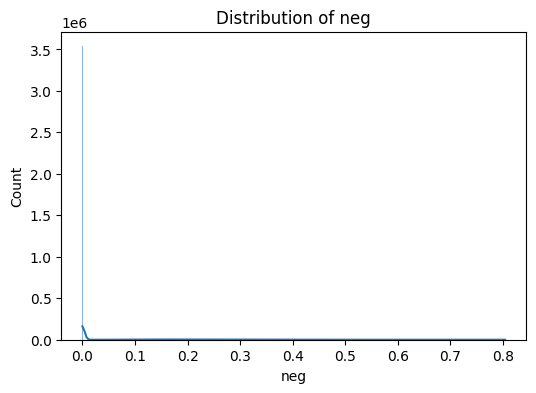

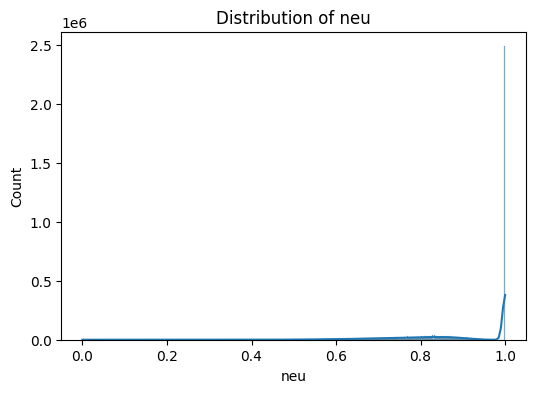

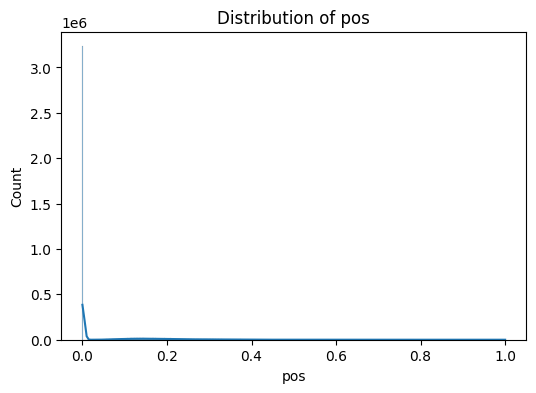

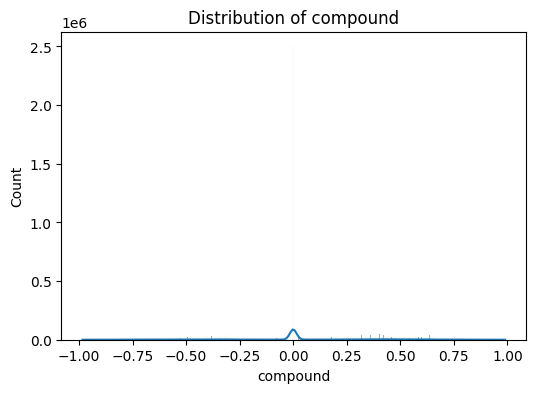

In [33]:
score_cols = ['neg', 'neu', 'pos', 'compound']

for col in score_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_all[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_all[score_cols])
plt.title("Boxplot of Sentiment Score Variables")
plt.show()

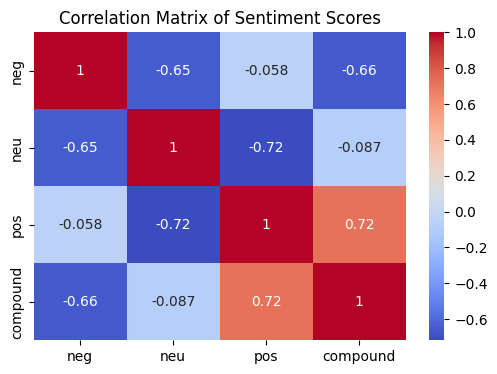

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df_all[score_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Sentiment Scores")
plt.show()

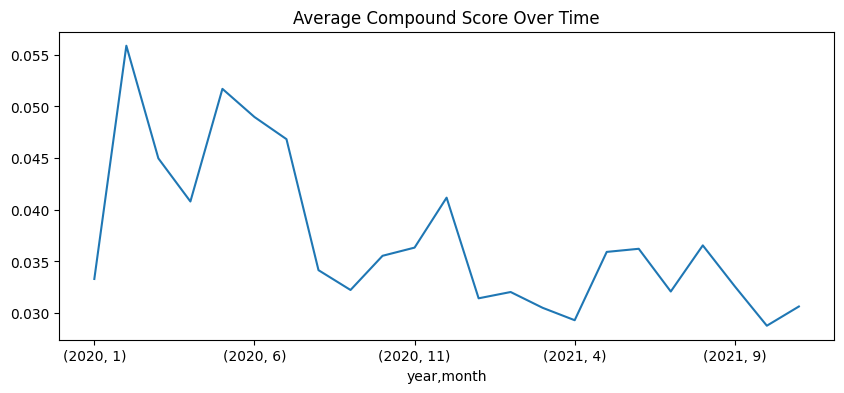

In [5]:
df_all[df_all["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

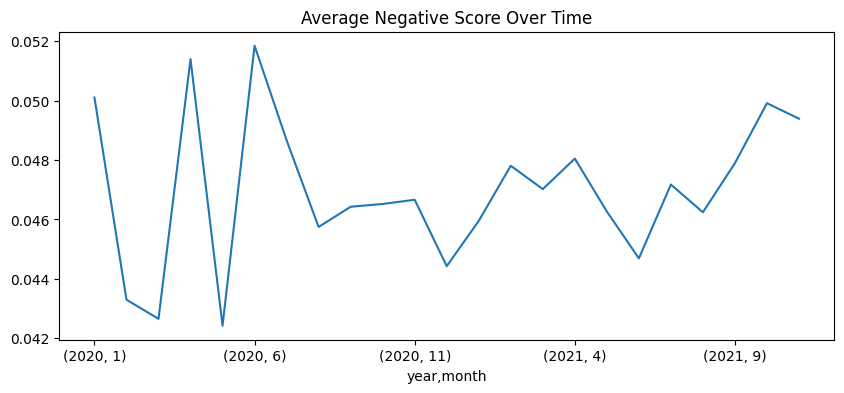

In [ ]:
df_all[df_all["year"] > 2019].groupby(['year', 'month'])['neg'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Negative Score Over Time")
plt.show()

# Countries Chosen for Analysis

### Russia

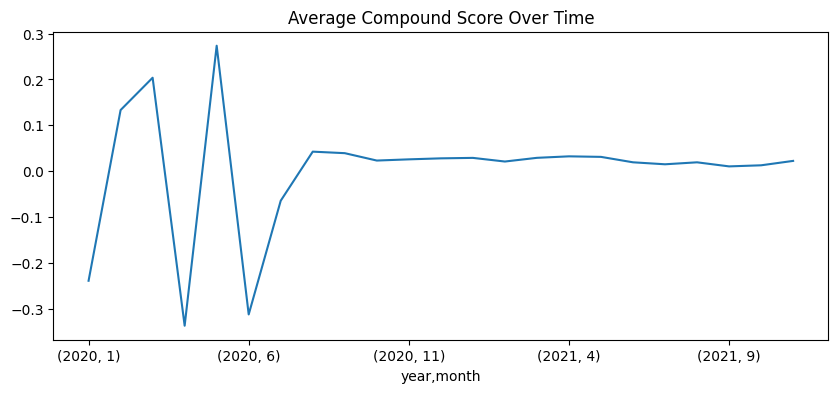

In [6]:
df_rus = df_all[df_all["location"] == 'Russian Federation']

df_rus[df_rus["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### India

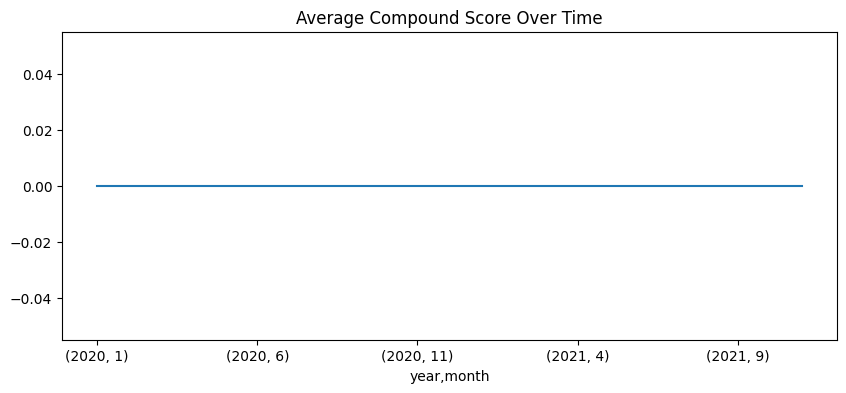

In [7]:
df_india = df_all[df_all["location"] == 'India']

df_india[df_india["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### Italy

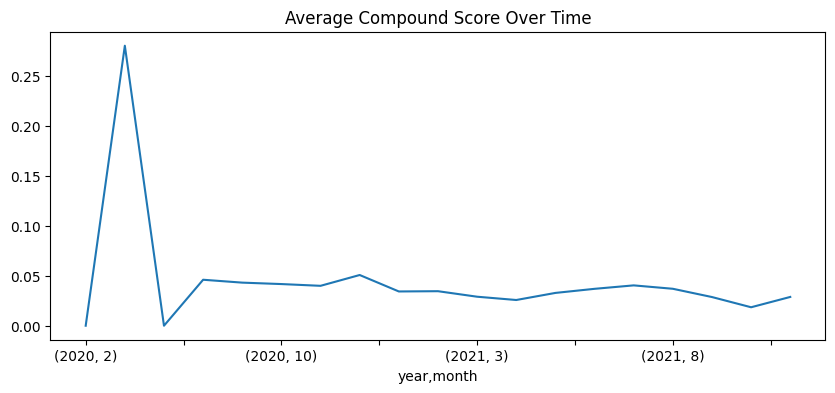

In [9]:
df_italy = df_all[df_all["location"] == 'Italy']

df_italy[df_italy["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### China

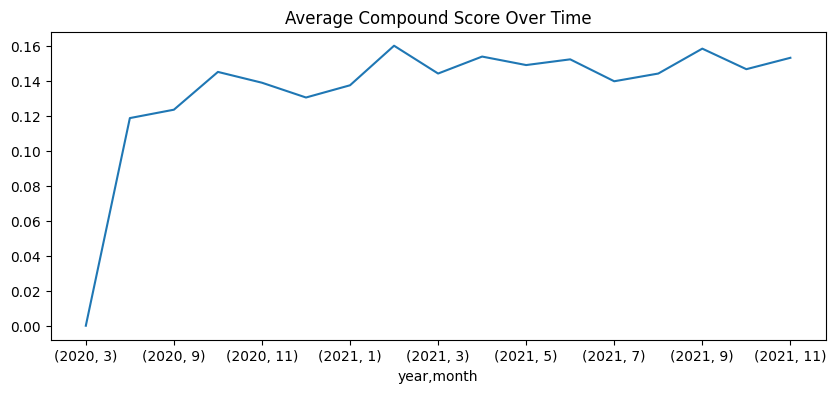

In [ ]:
df_china = df_all[df_all["location"] == 'China']

df_china[df_china["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### Canada

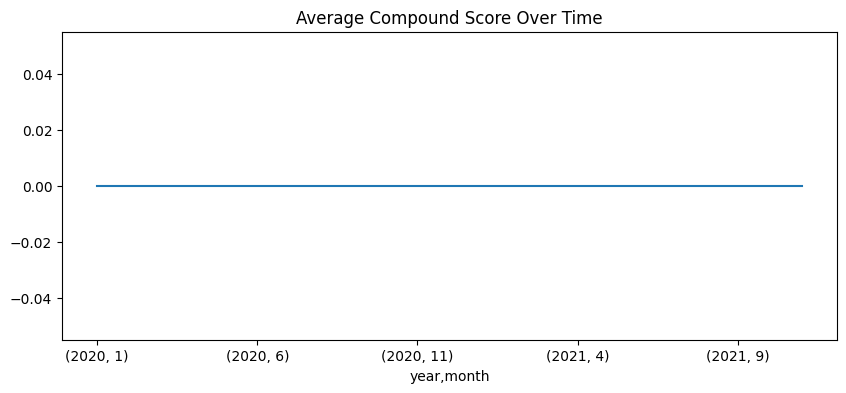

In [ ]:
df_ca = df_all[df_all["location"] == "Canada"]

df_ca[df_ca["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### United States of America

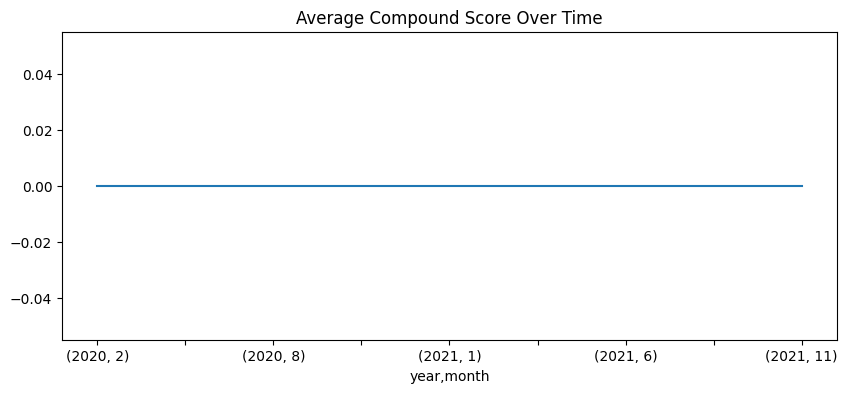

In [ ]:
df_usa = df_all[df_all["location"] == 'United States of America']

df_usa[df_usa["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### Argentina

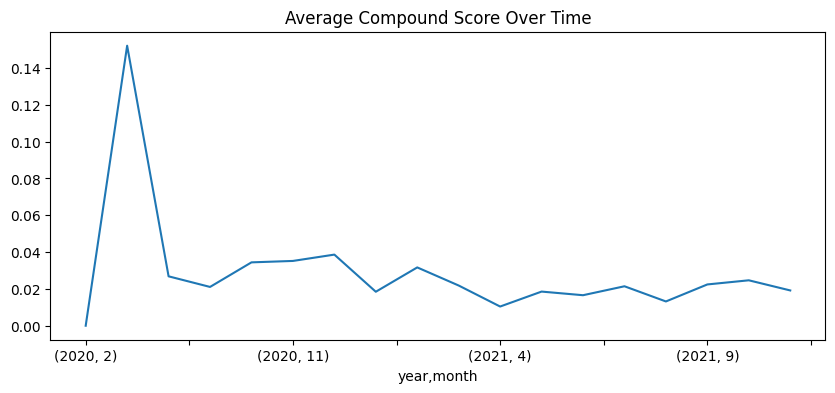

In [ ]:
df_arg = df_all[df_all["location"] == 'Argentina']

df_arg[df_arg["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()